### Estadistica

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt

In [6]:
# Leer los datos
empleados_df = pd.read_csv('empleados.csv')  

proyectos_df = pd.read_csv('proyectos.csv')

print("----------------0------------------")
print(empleados_df.head())
print("----------------0------------------")
print(proyectos_df.head())

----------------0------------------
   id_empleado     tx_nif  tx_nombre tx_apellido1 tx_apellido2 f_nacimiento  \
0            1  46512387Z  Estefania       Gamero       Garcia   1999-01-05   
1            2  12345678A     Silvia       García        López   1995-03-15   
2            3  47894562X      Irene      Pacheco     Paniagua   1993-11-30   
3            4  46512387Z      Pablo        Verdu      Rascado   1990-06-15   
4            5  48712345X     Sandra       Tello        Cuello   1994-11-25   

   n_telefono1  n_telefono2                    tx_email      f_alta  \
0    628456123          NaN  Estefania.Gamero@email.com  2018-01-10   
1    612345678  912345678.0     Silvia.garcia@email.com  2020-06-01   
2    634567890  645678901.0     irene.pacheco@email.com  2022-07-05   
3    612345678  623456789.0       pablo.verdu@email.com  2021-03-20   
4    611223344  622334455.0      sandra.tello@email.com  2022-05-10   

       f_baja cx_edocivil b_formacionu  
0         NaN        

### Calcular los años de antigüedad de los empleados

In [22]:
empleados_df['f_alta'] = pd.to_datetime(empleados_df['f_alta'])
empleados_df['antiguedad'] = (pd.to_datetime('today') - empleados_df['f_alta']).dt.days / 365

#Top 5 empleados que mas años llevan en la compañia
top_5_recientes = empleados_df.sort_values('f_alta',ascending=True).head(5)
top_5_recientes[['tx_nombre','tx_apellido1','f_alta']]

,tx_nombre,tx_apellido1,f_alta
0,Estefania,Gamero,2018-01-10
1,Silvia,García,2020-06-01
5,Ivan bang,Gutiérrez,2021-03-10
3,Pablo,Verdu,2021-03-20
4,Sandra,Tello,2022-05-10


### Distribución del número de años de los empleados en la empresa

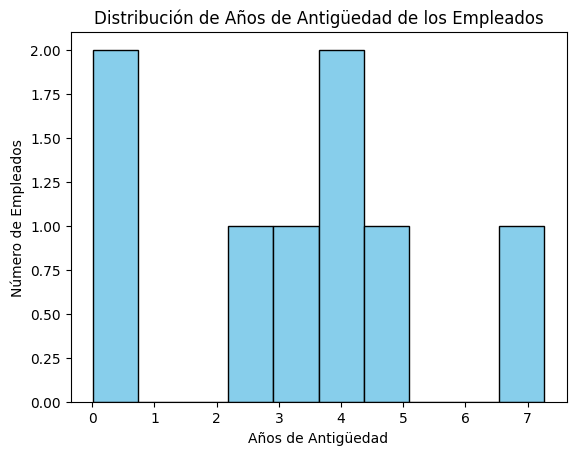

In [23]:
plt.hist(empleados_df['antiguedad'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución de Años de Antigüedad de los Empleados')
plt.xlabel('Años de Antigüedad')
plt.ylabel('Número de Empleados')
plt.show()

### Evolución temporal de altas por años

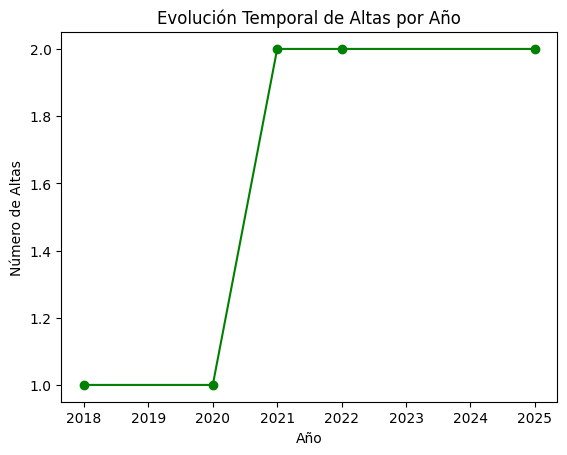

In [24]:
empleados_df["año_alta"] = empleados_df['f_alta'].dt.year

#contamos el numero de altas por año 
altas_por_año = empleados_df.groupby('año_alta').size()

# Gráfico de la evolución de las altas por año
altas_por_año.plot(kind='line', color='green', marker='o')
plt.title('Evolución Temporal de Altas por Año')
plt.xlabel('Año')
plt.ylabel('Número de Altas')
plt.show()

### Evolución temporal de bajas por años

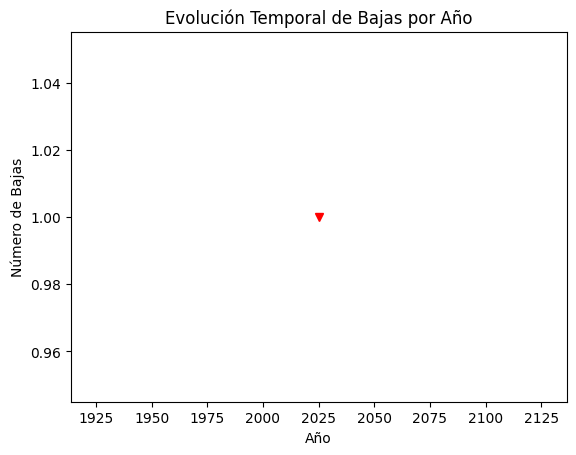

In [32]:

empleados_df['año_baja'] = pd.to_datetime(empleados_df['f_baja'], errors='coerce').dt.year
bajas_por_año = empleados_df.groupby('año_baja').size()

# Gráfico de la evolución de las bajas por año
bajas_por_año.plot(kind='line', color='red', marker='v')
plt.title('Evolución Temporal de Bajas por Año')
plt.xlabel('Año')
plt.ylabel('Número de Bajas')
plt.show()

### ¿Cuáles han sido los dos años de mayor crecimiento/decrecimiento de empleados?



In [33]:
crecimiento_empleados = altas_por_año.diff().fillna(0)

crecimiento_empleados.sort_values(ascending=False).head(2), crecimiento_empleados.sort_values().head(2)


(año_alta
 2021    1.0
 2018    0.0
 dtype: float64,
 año_alta
 2018    0.0
 2020    0.0
 dtype: float64)

###  Distribución de empleados solteros vs casados

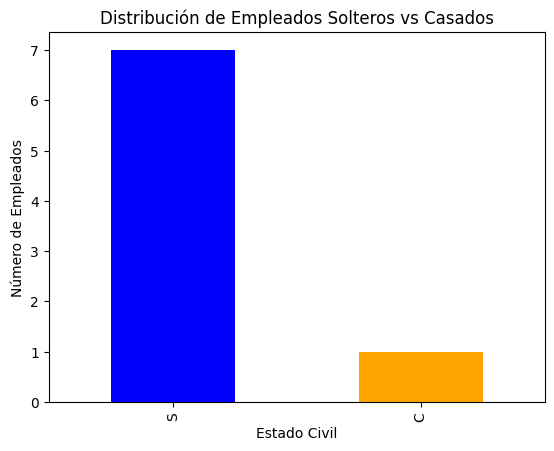

In [45]:
# Suponiendo que la columna de estado civil es 'cx_edocivil', con valores "Casado" y "Soltero"
estado_civil = empleados_df['cx_edocivil'].value_counts()

# Gráfico de barras
estado_civil.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribución de Empleados Solteros vs Casados')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Empleados')
plt.show()

### Edad media y desviación típica de los empleados

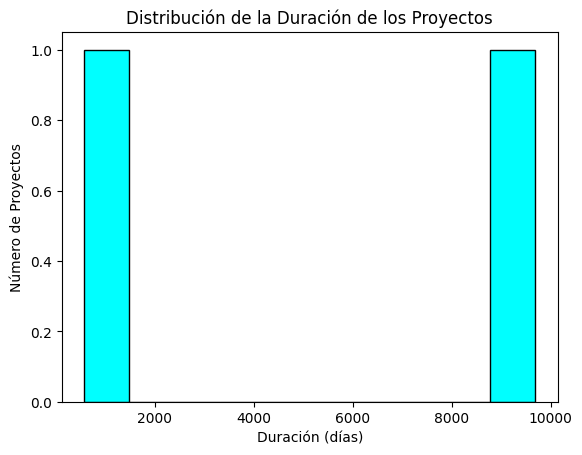

In [48]:
# Calcular la duración de cada proyecto
proyectos_df['f_inicio'] = pd.to_datetime(proyectos_df['f_inicio'], errors='coerce')
proyectos_df['f_fin'] = pd.to_datetime(proyectos_df['f_fin'], errors='coerce')

proyectos_df['duracion'] = (proyectos_df['f_fin'] - proyectos_df['f_inicio']).dt.days

# Histograma de la duración de los proyectos
plt.hist(proyectos_df['duracion'], bins=10, color='cyan', edgecolor='black')
plt.title('Distribución de la Duración de los Proyectos')
plt.xlabel('Duración (días)')
plt.ylabel('Número de Proyectos')
plt.show()

### Distribución de proyectos por lugar

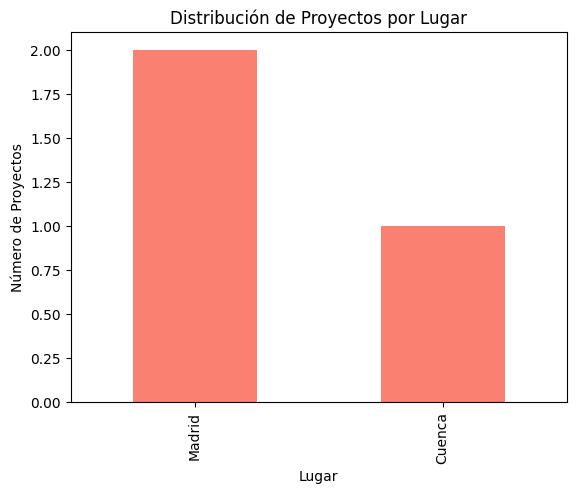

In [49]:
proyectos_por_lugar = proyectos_df['tx_lugar'].value_counts()


proyectos_por_lugar.plot(kind='bar', color='salmon')
plt.title('Distribución de Proyectos por Lugar')
plt.xlabel('Lugar')
plt.ylabel('Número de Proyectos')
plt.show()

###  Distribución del número de proyectos a los que están asignados los empleados

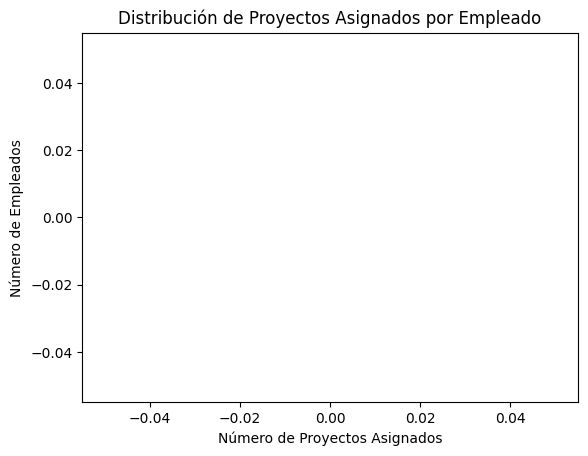

In [14]:
empleados_proyectos_df = pd.read_csv('empleados_proyectos.csv')
empleados_proyectos_df = empleados_proyectos_df.merge(empleados_df, on='id_empleado', how='left')
empleados_proyectos_df = empleados_proyectos_df.merge(proyectos_df, on='id_proyecto', how='left')
proyectos_asignados = empleados_proyectos_df.groupby('id_empleado')['id_proyecto'].count()

plt.hist(proyectos_asignados, bins=range(1, proyectos_asignados.max() + 1), color='green', edgecolor='black')
plt.title('Distribución de Proyectos Asignados por Empleado')
plt.xlabel('Número de Proyectos Asignados')
plt.ylabel('Número de Empleados')
plt.show()

### Top 5 proyectos con más personas asignadas

In [ ]:
proyectos_asignados = empleados_proyectos_df.groupby('id_proyecto')['id_empleado'].count()

top_5_proyectos = proyectos_asignados.sort_values(ascending=False).head(5)
print(top_5_proyectos)

id_proyecto
1    3
2    2
Name: id_empleado, dtype: int64


###  Lista de proyectos sin personas asignadas

In [65]:
proyectos_sin_asignar = proyectos_asignados[proyectos_asignados == 0]

print(f"Proyectos sin asignar: {proyectos_sin_asignar}")

Proyectos sin asignar: Series([], Name: id_empleado, dtype: int64)
